# Tutorial 2 - Introduction to Neural Networks

This tutorial is an example of a possible design of a (Deep) Neural Network.
For the training and the test of the NN will be used the dataset prepared in Tutorial 1.

## Table of contents
- Data loading and reading
- Design a simple DNN
- Train the DNN
- Evaluation of the model on the testing data

## Data loading and reading

In [1]:
import pandas as pd

We will use the datasets prepared and saved in Tutorial 1. 

If you don't have the four csv files saved in the current repository they can be downloaded by using the function get_data that saves a copy of the four datasets.
If you have already the four csv files saved in the current repository skip this step and go to the next one.

In [2]:
import requests
import os
import program
from program import get_data
data_file = get_data("https://www.dropbox.com/s/0jraecfbh1ahd8n/X_train.csv?dl=1")
os.rename('data.csv', 'X_train.csv')
data_file = get_data("https://www.dropbox.com/s/da4hatrc6inpjt6/X_test.csv?dl=1")
os.rename('data.csv', 'X_test.csv')
data_file = get_data("https://www.dropbox.com/s/xhm68m14kijkl5t/y_train.csv?dl=1")
os.rename('data.csv', 'y_train.csv')
data_file = get_data("https://www.dropbox.com/s/xj9dvu6zecq7k4k/y_test.csv?dl=1")
os.rename('data.csv', 'y_test.csv')

Writing dataset on disk
Writing dataset on disk
Writing dataset on disk
Writing dataset on disk


Now we can simply use pandas DataFrame to handle the data.

In [3]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')
y_train.shape

(572766, 1)

## Design a simple DNN

We build a densely-connected network using the sequential Keras model, which is a linear stack of layers.
For more informations about **`Keras`** you can find the documentation on [Keras website](https://keras.io/about/) and on [Guide to the Sequential Model](https://keras.rstudio.com/articles/sequential_model.html).

The model needs to know what input shape it should expect. So for the 1st layer of the net the input_dim is a necessary argument to be specified. The following layers can do automatic shape inference.

We will use a DNN with the same structure used in program.py:
- Seven hidden layers with respectively 64, 128, 128, 64, 32, 16 and 8 neurons;
- ReLu function has been used as activation function for all the layers, except for the output layer for which the Sigmoid function has been used;
- the *binary crossentropy* has been used as the loss function;
- the *adam* algorithm has been used as the optimizer;
- the *accuracy* has been used as the metric.

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=30, kernel_regularizer=l2(0.001)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss= 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 1

## Train the DNN

In order to train the model, we pass the training data to the fit function. However, part of the training data will be used as validation data, which is used during the training to evaluate the training process. 

In [5]:
import numpy as np
X_train = np.asarray(X_train, dtype = 'float32')
y_train = np.asarray(y_train, dtype = 'float32')
history = model.fit(X_train, y_train, validation_split=0.3, epochs=38, batch_size=700)        

Epoch 1/38
573/573 [==============================] - 5s 10ms/step - loss: 0.5332 - accuracy: 0.8143 - val_loss: 0.4367 - val_accuracy: 0.8344
Epoch 2/38
573/573 [==============================] - 5s 9ms/step - loss: 0.4231 - accuracy: 0.8354 - val_loss: 0.4075 - val_accuracy: 0.8397
Epoch 3/38
573/573 [==============================] - 5s 9ms/step - loss: 0.4062 - accuracy: 0.8373 - val_loss: 0.4004 - val_accuracy: 0.8390
Epoch 4/38
573/573 [==============================] - 5s 9ms/step - loss: 0.3971 - accuracy: 0.8387 - val_loss: 0.3925 - val_accuracy: 0.8391
Epoch 5/38
573/573 [==============================] - 5s 9ms/step - loss: 0.3919 - accuracy: 0.8392 - val_loss: 0.3884 - val_accuracy: 0.8402
Epoch 6/38
573/573 [==============================] - 5s 9ms/step - loss: 0.3887 - accuracy: 0.8392 - val_loss: 0.3877 - val_accuracy: 0.8401
Epoch 7/38
573/573 [==============================] - 5s 9ms/step - loss: 0.3866 - accuracy: 0.8399 - val_loss: 0.3855 - val_accuracy: 0.8400
Epoch

## Evaluation of the model on the testing data

Let's evaluate the loss and accuracy on our test data

In [ ]:
X_test = np.asarray(X_test, dtype = 'float32')
y_test = np.asarray(y_test, dtype = 'float32')
loss_and_metrics = model.evaluate(X_test, y_test)
print (loss_and_metrics)

6786/7671 [=========================>....] - ETA: 1s - loss: 0.3737 - accuracy: 0.8416

We can plot the loss evolution and the accuracy over the training epochs for the training and validation dataset

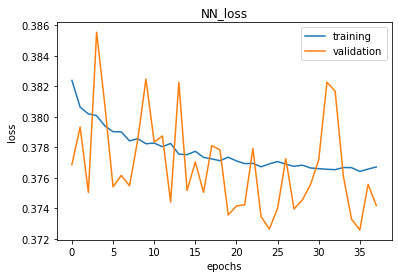

In [12]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'], Label = 'Loss')
plt.plot(history.history['val_loss'])
plt.title('NN_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

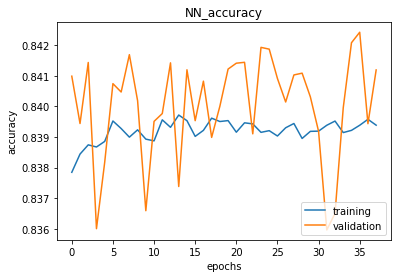

In [13]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('NN_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training', 'validation'], loc='lower right')        
plt.show()

Then we can plot the DNN Output which corresponds to the value of the prediction obtained on the events of the test sets.

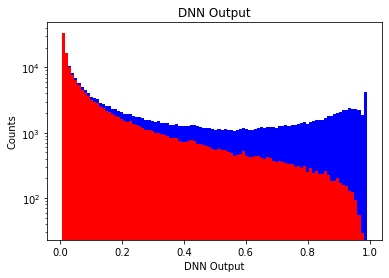

In [14]:
    plt.figure()
    plt.title('DNN Output')
    plt.xlabel('DNN Output')
    plt.ylabel('Counts')
    plt.yscale('log')
    
    DNN_Output = model.predict(X_test)
    background = DNN_Output[y_test==0]
    signal = DNN_Output[y_test==1]
    plt.hist([background, signal], color=['red', 'blue'], bins= 100, histtype = 'barstacked')
    plt.show()

The DNN output assumes values that can be between 0 and 1.
An event which is predicted to be a pure background event corresponds to 0, while an expected pure signal event corresponds to 1.
There are two different colours: the red corresponds to the counts related to
the events labelled as background and the blue corresponds to those counts related to the
events labelled as signal.